# SPAC Demonstration Notebook
8/9/2024 on Synthetic Dataset

## Module Imports

In [18]:
# Import functions from modules in the spac package
from spac.data_utils import *
from spac.transformations import *
from spac.visualization import *
from spac.spatial_analysis import *

In [57]:
import numpy as np
import pandas as pd
from math import ceil, sqrt
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


## Data Preprocessing


### Load CSV Files

In [3]:
# Step 1: Load CSV files
file_names = ['SPAC_Synthetic_Example.csv']
data = load_csv_files(file_names)

2024-08-09 11:03:22,732 - INFO - CSVs are converted into dataframes and combined into a list!
2024-08-09 11:03:22,733 - INFO - Total of 1 dataframes in the list.
2024-08-09 11:03:22,734 - INFO - File name: SPAC_Synthetic_Example.csv
2024-08-09 11:03:22,734 - INFO - Info: 
2024-08-09 11:03:22,741 - INFO - None
2024-08-09 11:03:22,741 - INFO - Description: 
2024-08-09 11:03:22,754 - INFO -               XMin         YMin         XMax         YMax  Marker 1 Intensity  \
count  4000.000000  4000.000000  4000.000000  4000.000000         4000.000000   
mean     15.023263    27.503914    35.001047    47.485636           54.968939   
std      10.075772    22.520211    10.067823    22.526520           45.013052   
min       2.010295     1.830543    21.849440    22.012755            6.807492   
25%       4.968221     5.011522    24.988489    24.982587            9.966993   
50%      15.295660    27.223661    34.973920    47.365072           54.940240   
75%      25.078264    50.011596    45.0361

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 375.1+ KB


### Select Values and Subsetting the Dataset

In [20]:
# Step 2: Select values based on file name
# Subset data for each file name
subsets = []
slide_identifier_column = 'file_name'
unique_file_names = data[slide_identifier_column].unique()
for file_name in unique_file_names:
    print(f'Subsetting data for {file_name}')
    subset = select_values(data, annotation=slide_identifier_column, values=[file_name])
    subsets.append(subset)

2024-08-09 11:15:29,613 - INFO - Summary of returned dataset: 1000 cells match the selected labels.
2024-08-09 11:15:29,615 - INFO - Summary of returned dataset: 1000 cells match the selected labels.
2024-08-09 11:15:29,616 - INFO - Summary of returned dataset: 1000 cells match the selected labels.
2024-08-09 11:15:29,618 - INFO - Summary of returned dataset: 1000 cells match the selected labels.


Subsetting data for Halo_Synthetic_Example_1
Subsetting data for Halo_Synthetic_Example_2
Subsetting data for Halo_Synthetic_Example_3
Subsetting data for Halo_Synthetic_Example_4


### Add Customized Annotation to Subsets

In [5]:
# Step 3: Append new annotations to each subset
# Create a dictionary with file-specific labels
annotations_for_file=[
    {'slide': '1', 'animal': 'A'},
    {'slide': '2', 'animal': 'B'},
    {'slide': '3', 'animal': 'C'},
    {'slide': '4', 'animal': 'D'},
]

for i, subset in enumerate(subsets):
    subset = append_annotation(subset, annotations_for_file[i])


### Combine All Subsets

In [6]:
# Step 4: Combine the subsets back into a single DataFrame
combined_data = combine_dfs(subsets)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
 12  slide               4000 non-null   object 
 13  animal              4000 non-null   object 
dtypes: float64(7), int64(3), object(4)
memory usage: 437.6+ KB


### Convert Binary Label Columns into Single Catetorical Column

In [7]:
# Step 5: Convert binary columns to a categorical column
binary_columns = ['Immuno Cells', 'Normal Cells', 'Cancer Cells']
new_annotation = 'cell_type'
combined_data = bin2cat(combined_data, binary_columns, new_annotation)
combined_data.info()

Immuno Cells
Normal Cells
Cancer Cells
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
 12  slide               4000 non-null   object 
 13  animal              4000 non-null   object 
 14  cell_type           4000 non-null   object 
dtypes: float64(7), i

### Calculate Spatial Centroid of Cells

In [8]:
# Step 6: Calculate centroids for each cell
x_min_col = 'XMin'  # replace with your actual column name
x_max_col = 'XMin'  # replace with your actual column name
y_min_col = 'YMin'  # replace with your actual column name
y_max_col = 'YMax'  # replace with your actual column name
x_centroid = 'X_Centroid'
y_centroid = 'Y_Centroid'

combined_data = calculate_centroid(
    combined_data,
    x_min=x_min_col,
    x_max=x_max_col,
    y_min=y_min_col,
    y_max=y_max_col,
    new_x=x_centroid,
    new_y=y_centroid
)

combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   file_name           4000 non-null   object 
 1   XMin                4000 non-null   float64
 2   YMin                4000 non-null   float64
 3   XMax                4000 non-null   float64
 4   YMax                4000 non-null   float64
 5   Marker 1 Intensity  4000 non-null   float64
 6   Marker 2 Intensity  4000 non-null   float64
 7   Marker 3 Intensity  4000 non-null   float64
 8   Immuno Cells        4000 non-null   int64  
 9   Normal Cells        4000 non-null   int64  
 10  Cancer Cells        4000 non-null   int64  
 11  loaded_file_name    4000 non-null   object 
 12  slide               4000 non-null   object 
 13  animal              4000 non-null   object 
 14  cell_type           4000 non-null   object 
 15  X_Centroid          4000 non-null   float64
 16  Y_Cent

### Setup the Analysis with Selected Features and Annotations

In [9]:
# Step 6: Select and prepare columns for analysis
intensity_columns = [col for col in combined_data.columns if col.startswith('Marker')]

# Columns for centroid calculations and other necessary metadata
x_col = x_centroid
y_col = y_centroid
annotation_columns = ['slide', 'animal', 'cell_type']

# Ingest the data into an AnnData object
adata = ingest_cells(
    dataframe=combined_data,
    regex_str=intensity_columns,
    x_col=x_col,
    y_col=y_col,
    annotation=annotation_columns
)

print(adata)

Marker 1 Intensity
Marker 2 Intensity
Marker 3 Intensity
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial'


/data/BIDS-HPC/private/conda/envs/spac_demo_v07/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Data Transformation

### Normalization with Arcsinh Transformation

In [10]:
# Step 7: Normalize the features
# Normalize the features with default settings
norm_output_layer = 'arcsinh_norm'
arcsinh_transformation(
    adata,
    co_factor=5,
    output_layer=norm_output_layer
)
print(f"Transformed data stored in layer: {norm_output_layer}")
dataframe = pd.DataFrame(adata.layers[norm_output_layer])
print(dataframe.describe())
print(adata)

Transformed data stored in layer: arcsinh_norm
                 0            1            2
count  4000.000000  4000.000000  4000.000000
mean      2.563419     2.564666     2.997854
std       1.127568     1.127006     0.020174
min       1.115398     1.083621     2.917722
25%       1.440679     1.443686     2.984560
50%       2.684105     2.688077     2.998463
75%       3.689233     3.689794     3.010953
max       3.716741     3.720860     3.070602
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial'
    layers: 'arcsinh_norm'


### Scale the Normalized Dataset

In [11]:
# Step 8: Scale the features
# Scale the normalized features with default settings
norm_scaled_output_layer = 'arcsinh_scaled'
normalize_features(
    adata,
    input_layer=norm_output_layer,
    output_layer=norm_scaled_output_layer,
    low_quantile=0,
    high_quantile=1,
    interpolation='nearest')
print(f"Transformed data stored in layer: {norm_scaled_output_layer}")
dataframe = pd.DataFrame(adata.layers[norm_scaled_output_layer])
print(dataframe.describe())
print(adata)

Transformed data stored in layer: arcsinh_scaled
                 0            1            2
count  4000.000000  4000.000000  4000.000000
mean      0.556644     0.561589     0.524153
std       0.433456     0.427343     0.131957
min       0.000000     0.000000     0.000000
25%       0.125044     0.136531     0.437195
50%       0.603037     0.608385     0.528131
75%       0.989425     0.988221     0.609832
max       1.000000     1.000000     1.000000
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial'
    layers: 'arcsinh_norm', 'arcsinh_scaled'


### UMAP Dimention Reduction

In [12]:
# Step 9: Run UMAP Dimention Reduction
n_neighbors = 200
n_components = 2
min_dist = 0.1
metric = 'euclidean'
random_state = 0
transform_seed = 42
layer = norm_scaled_output_layer
run_umap(
    adata=adata,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    random_state=random_state,
    transform_seed=transform_seed,
    layer=layer
)

2024-08-09 11:03:23,142 - INFO - Using the table:"arcsinh_scaled"
/data/BIDS-HPC/private/conda/envs/spac_demo_v07/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type'
    obsm: 'spatial', 'X_umap'
    layers: 'arcsinh_norm', 'arcsinh_scaled'

### Unsupervised Clustering with Phenograph

In [15]:
# Step 10: Run Phenograph clustering
list_of_resolution = [0.01, 0.1, 0.2, 0.5, 0.8, 1]
K_NN_Value = 30
cluster_annotations = []
for resolution in list_of_resolution:
    annotation_name = f'phenograph_k{K_NN_Value}_{resolution}'
    cluster_annotations.append(annotation_name)
    phenograph_clustering(
        adata,
        layer=norm_scaled_output_layer,
        features=adata.var.index.to_list(),  # Use all available features
        k=K_NN_Value,
        seed=42,
        output_annotation=annotation_name,
        resolution_parameter=resolution
    )

for annotation_name in cluster_annotations:
    num_clusters = adata.obs[annotation_name].nunique()
    print(f'\nNumber of clusters identified in "{annotation_name}": {num_clusters}')

print(adata)

2024-08-09 11:04:56,283 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 11:04:56,285 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.029053688049316406 seconds
Jaccard graph constructed in 3.0748109817504883 seconds
Running Leiden optimization
Leiden completed in 0.2467021942138672 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.2038726806640625 seconds


2024-08-09 11:05:01,492 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 11:05:01,493 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.026055574417114258 seconds
Jaccard graph constructed in 2.7995288372039795 seconds
Running Leiden optimization
Leiden completed in 0.24445104598999023 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.816230773925781 seconds


2024-08-09 11:05:06,312 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 11:05:06,312 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.028033971786499023 seconds
Jaccard graph constructed in 2.4841973781585693 seconds
Running Leiden optimization
Leiden completed in 0.39902544021606445 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.800352096557617 seconds


2024-08-09 11:05:11,115 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 11:05:11,116 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.018963336944580078 seconds
Jaccard graph constructed in 2.561960458755493 seconds
Running Leiden optimization
Leiden completed in 0.408128023147583 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.795454502105713 seconds


2024-08-09 11:05:15,914 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 11:05:15,915 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.026720046997070312 seconds
Jaccard graph constructed in 2.7094006538391113 seconds
Running Leiden optimization
Leiden completed in 0.6324079036712646 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.479628324508667 seconds


2024-08-09 11:05:21,397 - INFO - Using the table:"arcsinh_scaled"
2024-08-09 11:05:21,398 - INFO - Using features:"['Marker 1 Intensity', 'Marker 2 Intensity', 'Marker 3 Intensity']"


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.028098106384277344 seconds
Jaccard graph constructed in 2.6418986320495605 seconds
Running Leiden optimization
Leiden completed in 0.6314048767089844 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 5.055913686752319 seconds

Number of clusters identified in "phenograph_k30_0.01": 4

Number of clusters identified in "phenograph_k30_0.1": 6

Number of clusters identified in "phenograph_k30_0.2": 9

Number of clusters identified in "phenograph_k30_0.5": 14

Number of clusters identified in "phenograph_k30_0.8": 19

Number of clusters identified in "phenograph_k30_1": 21
AnnData object with n_obs × n_vars = 4000 × 3
    obs: 'slide', 'animal', 'cell_type', 'phenograph_k30_0.01', 'phenograph_k30_0.1', 'phenograph_k30_0.2', 'phenograph_k30_0.5', 'phenograph_k30_0.8', 'phenograph_k30_1'
    uns: 'phenograph_features'
    obsm: 'spatial', 'X_umap'
    layers: 'arcsinh_n

## Visualizations

In [34]:
# Get all annotations (column names) from adata.obs
annotations = adata.obs.columns.tolist()
n_annotations = len(annotations)

# Calculate the number of rows and columns needed
n_cols = ceil(sqrt(n_annotations))
n_rows = ceil(n_annotations / n_cols)

def generate_grid_frame(
        fig_width,
        fig_height,
        dpi
    ):
    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(
        nrows=n_rows,
        ncols=n_cols,
        figsize=(
            fig_width,
            fig_height
        ),
        dpi=dpi
        )
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    return fig, axes

### UMAP Visualization of Annotations

Running visualization using the coordinates: "X_umap"
Cluster: 1, Points: 1000
Cluster: 2, Points: 1000
Cluster: 3, Points: 1000
Cluster: 4, Points: 1000
Running visualization using the coordinates: "X_umap"
Cluster: A, Points: 1000
Cluster: B, Points: 1000
Cluster: C, Points: 1000
Cluster: D, Points: 1000
Running visualization using the coordinates: "X_umap"
Cluster: Cancer Cells, Points: 1360
Cluster: Immuno Cells, Points: 1391
Cluster: Normal Cells, Points: 1249
Running visualization using the coordinates: "X_umap"
Cluster: 0, Points: 1000
Cluster: 1, Points: 1000
Cluster: 2, Points: 1000
Cluster: 3, Points: 1000
Running visualization using the coordinates: "X_umap"
Cluster: 0, Points: 1000
Cluster: 1, Points: 1000
Cluster: 2, Points: 1000
Cluster: 3, Points: 525
Cluster: 4, Points: 314
Cluster: 5, Points: 161
Running visualization using the coordinates: "X_umap"
Cluster: 0, Points: 1000
Cluster: 1, Points: 691
Cluster: 2, Points: 633
Cluster: 3, Points: 367
Cluster: 4, Points: 314


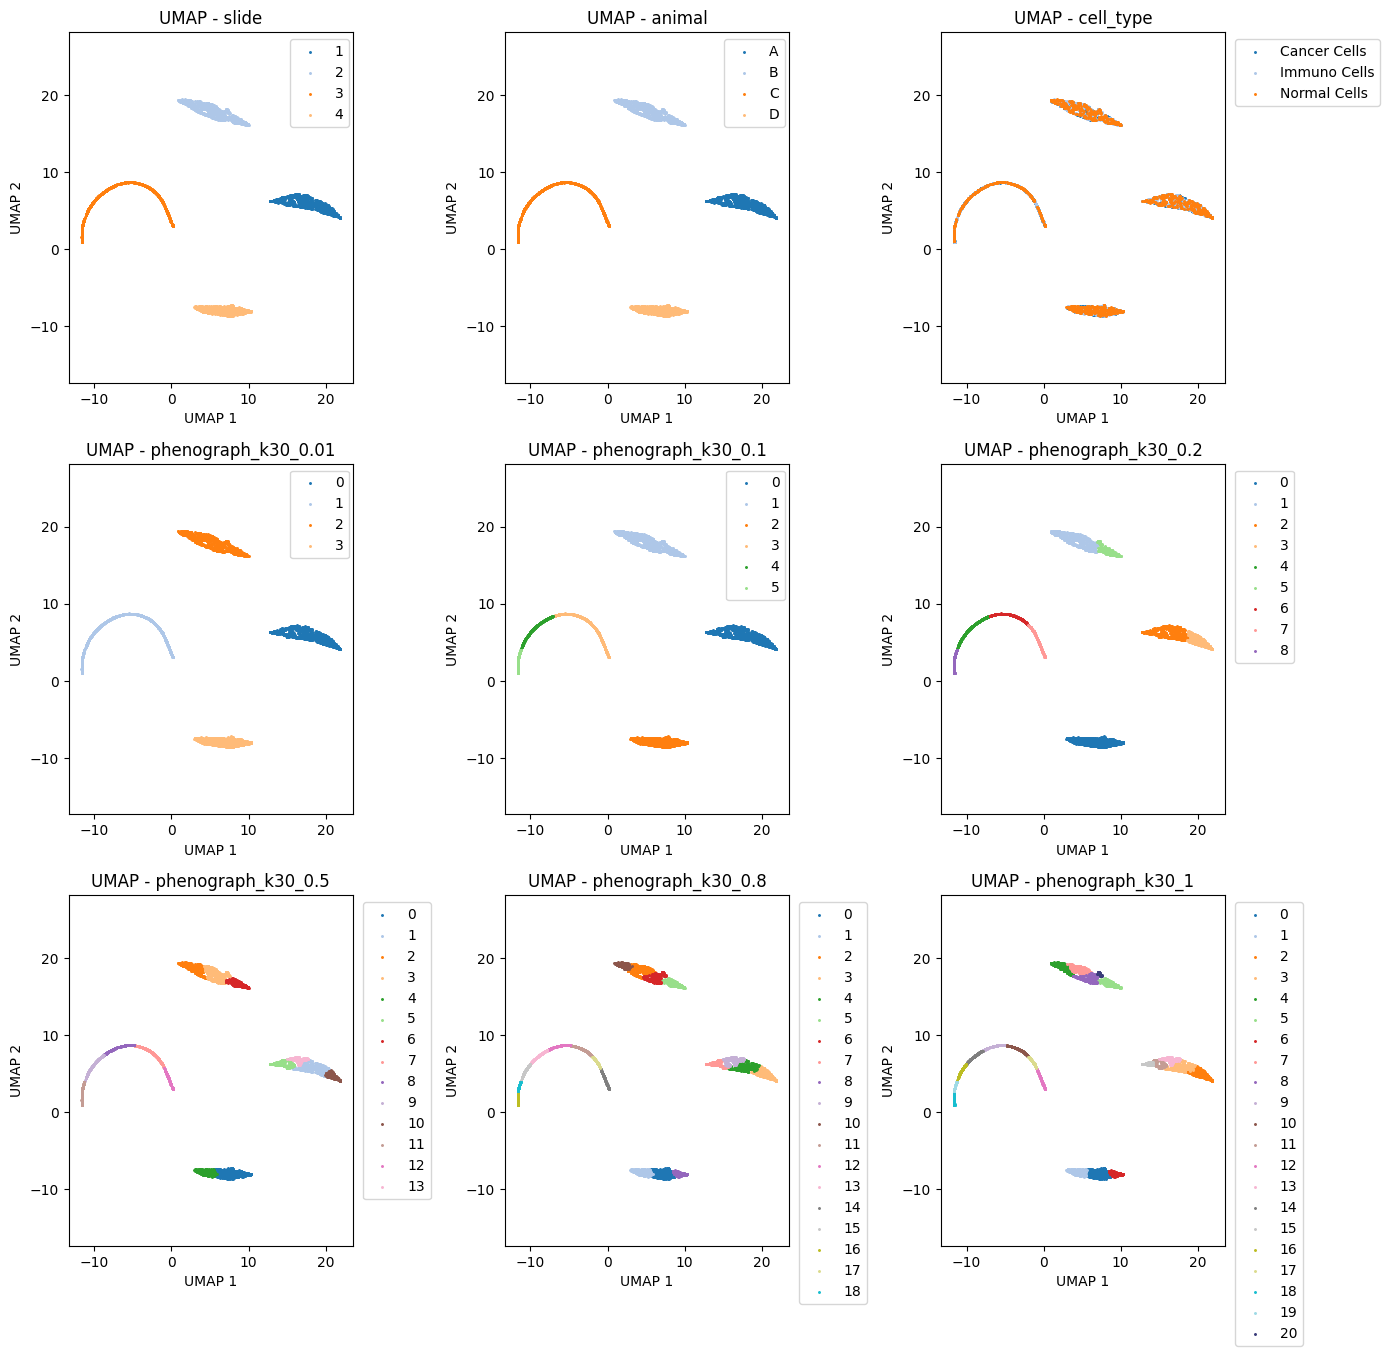

In [25]:
# Visualizations
# Plot UMAP with cluster annotations

# Setup plot parameters
feature = None
layer = "arcsinh_scaled"
method = "umap"
fig_width = 14
fig_height = 14
font_size = 12
fig_dpi = 300    
legend_location = "best"

fig, axes = generate_grid_frame(
    fig_width=fig_width,
    fig_height=fig_height,
    dpi=fig_dpi
)

# Loop through each annotation and create UMAP plots
for i, annotation in enumerate(annotations):
    ax = axes[i]
    
    # Plot the UMAP for the current annotation
    fig, ax = dimensionality_reduction_plot(
        adata=adata,
        method=method,
        annotation=annotation,
        feature=feature,
        layer=layer,
        ax=ax
    )
    
    # Set plot title and other properties
    ax.set_title(f"UMAP - {annotation}", fontsize=font_size)
    ax.legend(loc=legend_location, bbox_to_anchor=(1.01, 1))
    ax.grid(False)

# Hide any unused subplots (if any)
for i in range(n_annotations, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


### Box Plot of Features

Legend does not exist.


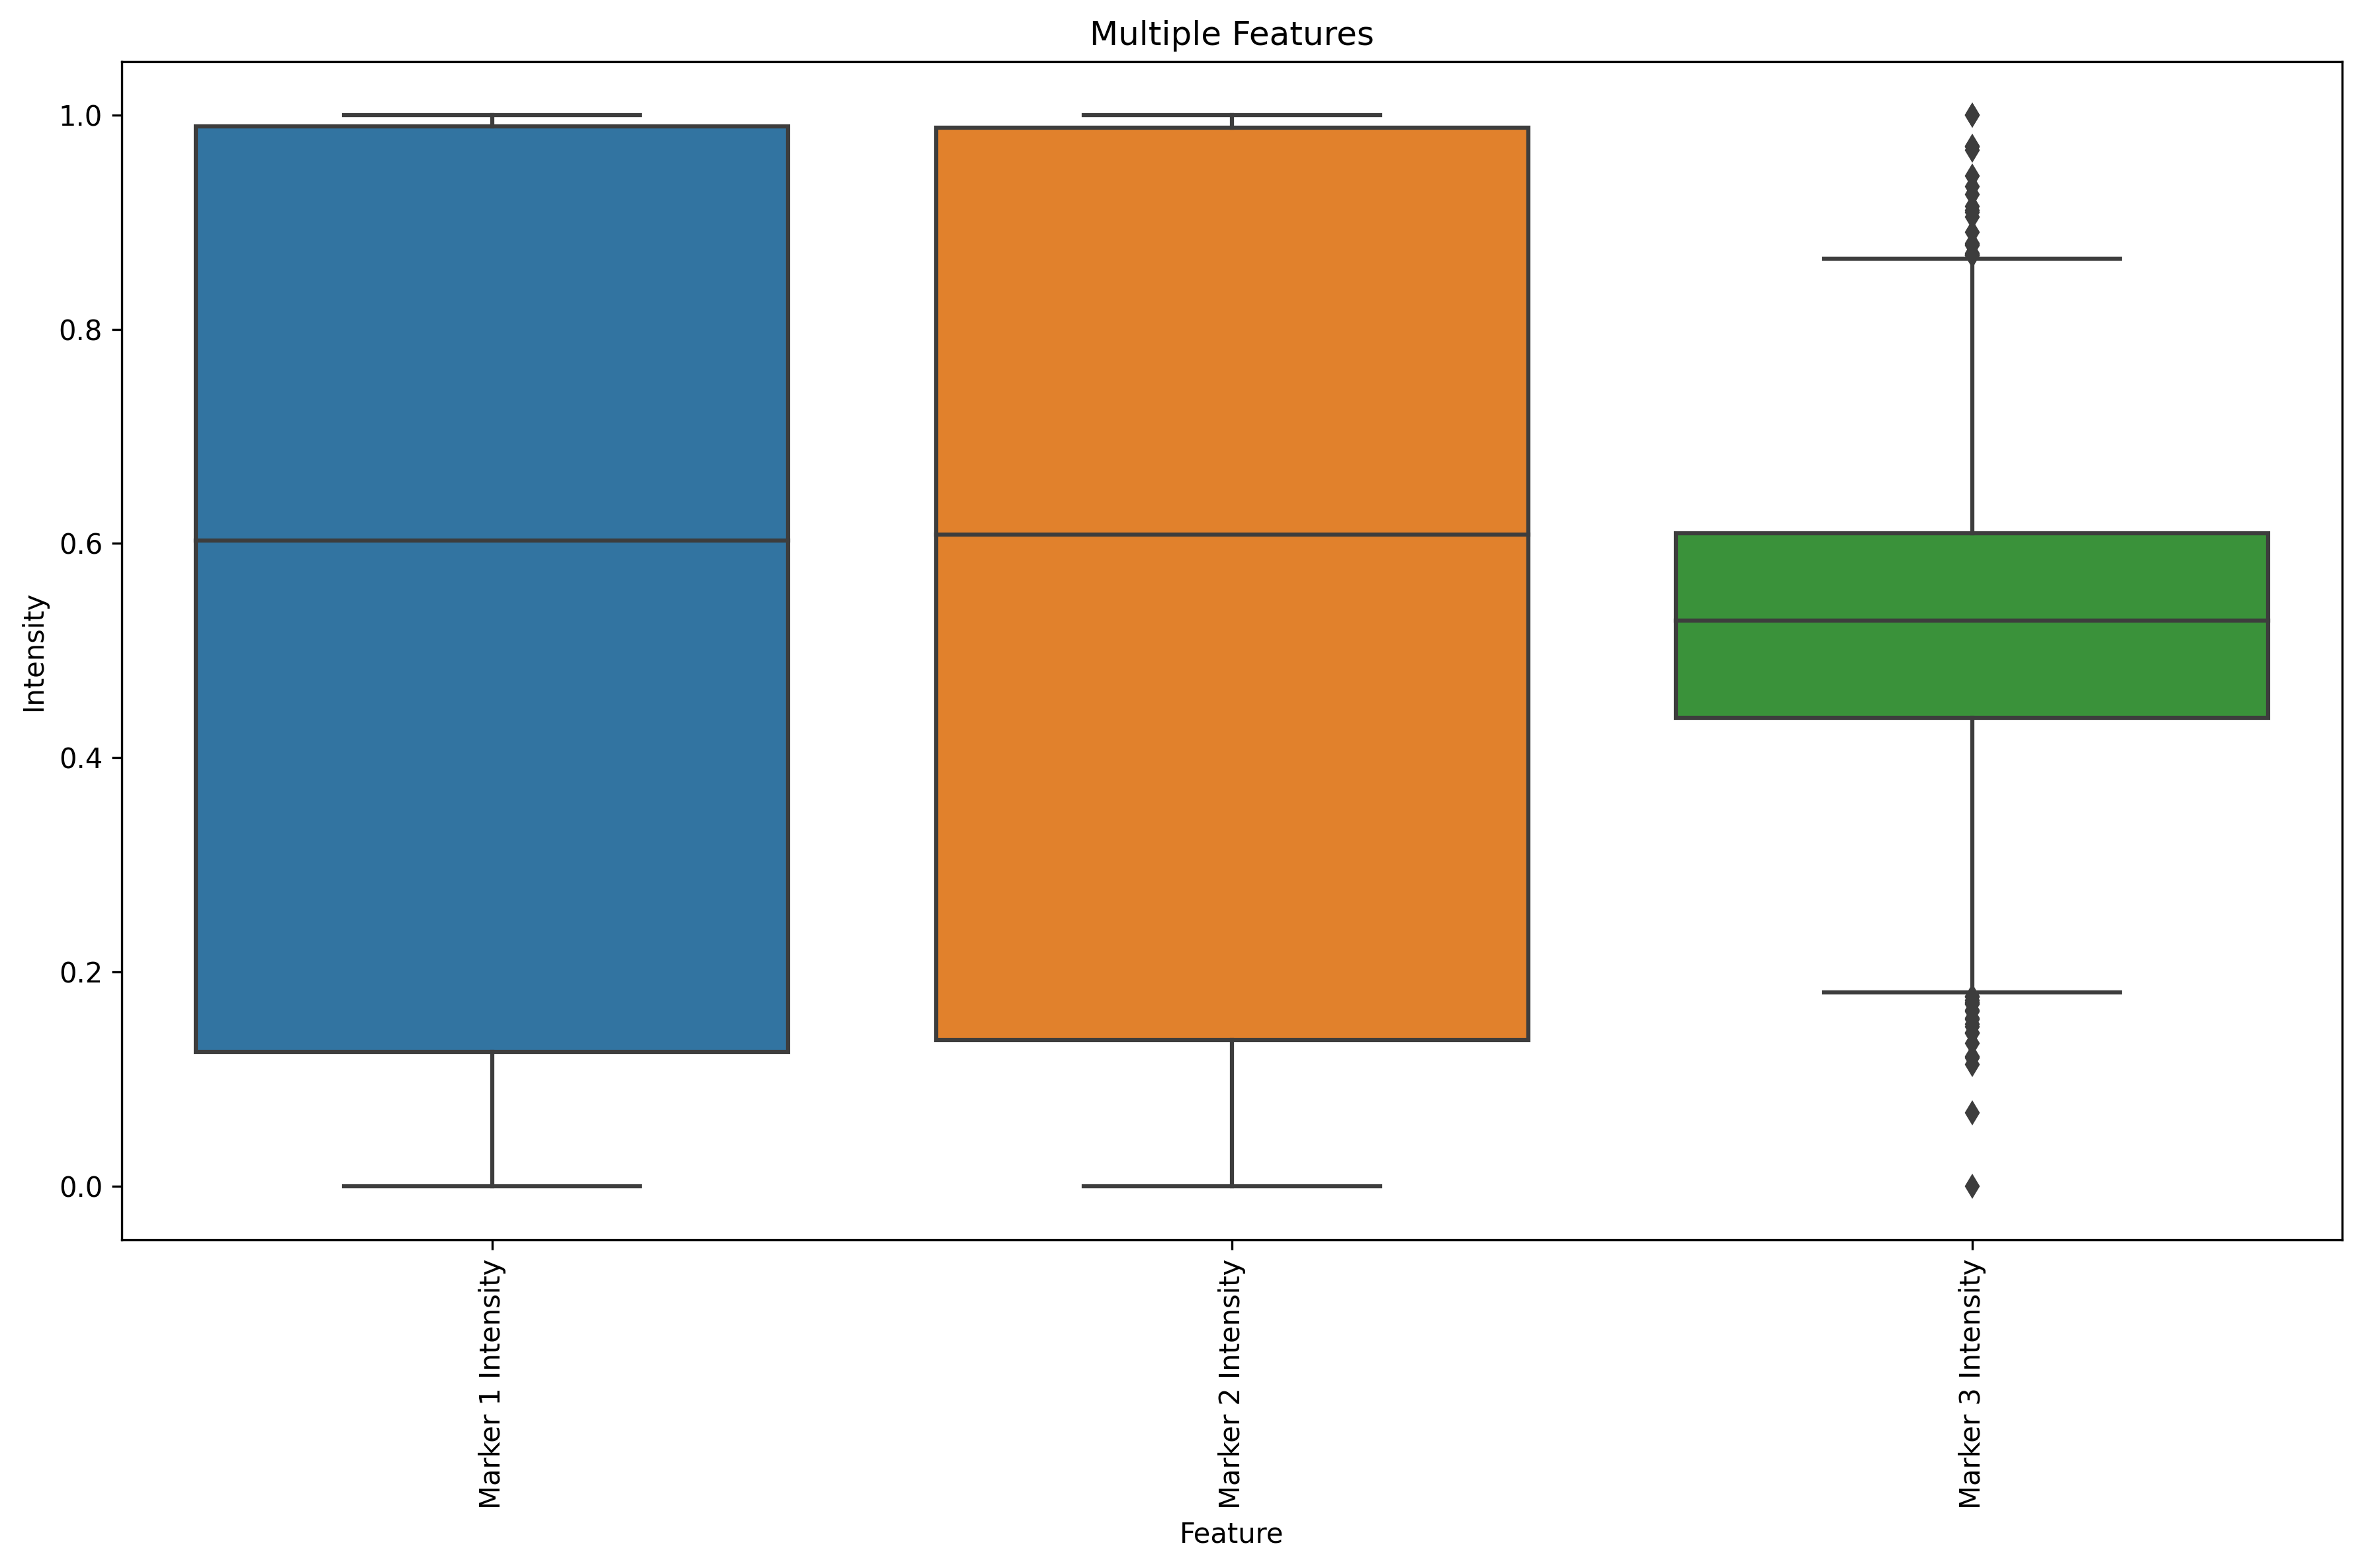

In [31]:
annotation = None
layer_to_plot = norm_scaled_output_layer
feature_to_plot = None
log_scale = False
Figure_Orientation="v"


Figure_Title = "BoxPlot"
Figure_Horizontal=False    
fig_width = 12
fig_height = 8
fig_dpi = 300
font_size = 10    

fig, ax = plt.subplots()
plt.rcParams.update({'font.size': font_size})
fig.set_size_inches(fig_width, fig_height)
fig.set_dpi(fig_dpi)

fig = boxplot(
    adata=adata,
    ax=ax,
    layer=layer_to_plot,
    annotation=annotation,
    second_annotation=None,
    features=feature_to_plot,
    log_scale=log_scale,
    orient=Figure_Orientation
)

# Move the legend outside the plotting area

# Check if a legend exists
try:
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
except Exception as e:
    print(f"Legend does not exist.")

# plt.close('all')
plt.tight_layout()
plt.show()

### Box Plot of All Annotations

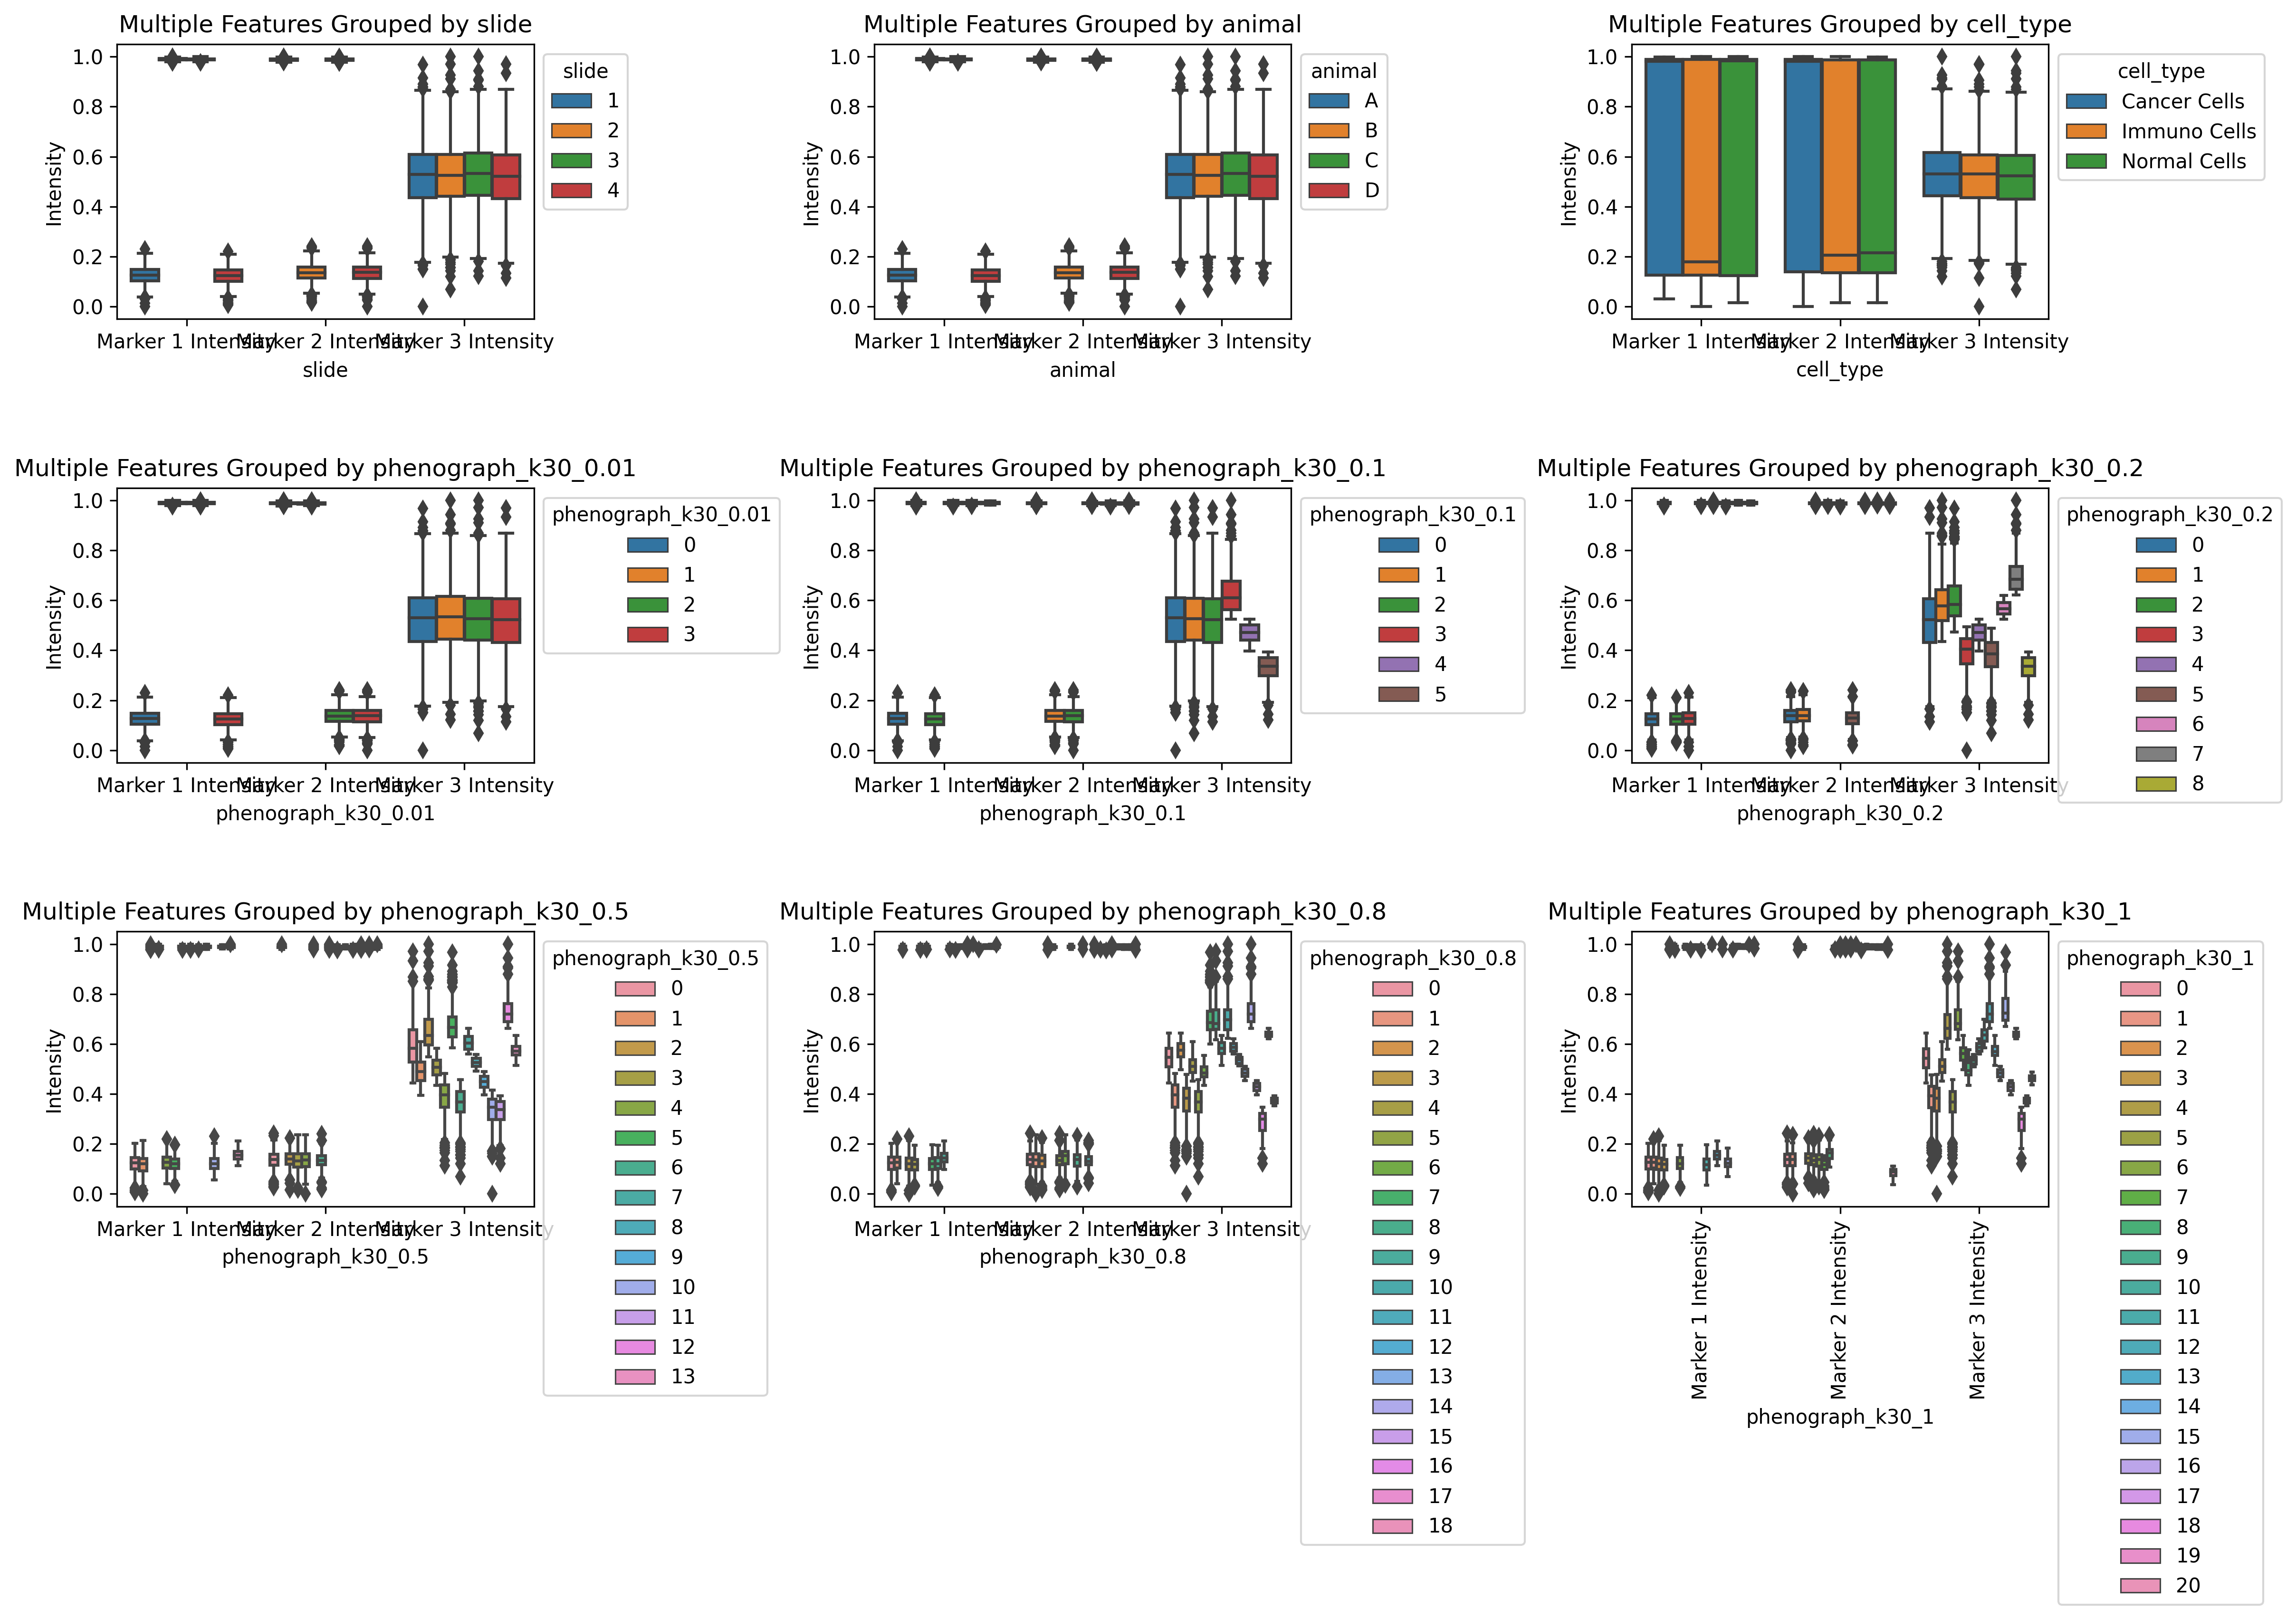

In [37]:
annotation = None
layer_to_plot = norm_scaled_output_layer
feature_to_plot = None
log_scale = False
Figure_Orientation="v"


Figure_Title = "BoxPlot"
Figure_Horizontal=False    
fig_width = 16
fig_height = 12
fig_dpi = 300
font_size = 10    



fig, axes = generate_grid_frame(
    fig_width=fig_width,
    fig_height=fig_height,
    dpi=fig_dpi
)

# Loop through each annotation and create UMAP plots
for i, annotation in enumerate(annotations):
    ax = axes[i]
    
    plt.rcParams.update({'font.size': font_size})
    ax.set_title(f"UMAP - {annotation}", fontsize=font_size)
    ax.grid(False)


    fig = boxplot(
        adata=adata,
        ax=ax,
        layer=layer_to_plot,
        annotation=annotation,
        second_annotation=None,
        features=feature_to_plot,
        log_scale=log_scale,
        orient=Figure_Orientation
    )

    # Move the legend outside the plotting area

    # Check if a legend exists
    try:
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    except Exception as e:
        print(f"Legend does not exist.")
    

# Hide any unused subplots (if any)
for i in range(n_annotations, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### Histogram of Features

In [52]:
def grid_plot_for_hisotmap(feature):
    fig, axes = generate_grid_frame(
        fig_width=fig_width,
        fig_height=fig_height,
        dpi=fig_dpi
    )

    # Loop through each annotation and create UMAP plots
    for i, annotation in enumerate(annotations):
        ax = axes[i]

        num_rows = adata.X.shape[0]

        def cal_bin_num(
            num_rows
        ):
            bins = max(int(2*(num_rows ** (1/3))), 1)
            print(f'Automatically calculated number of bins is: {bins}')
            return(bins)
        
        if feature:
            bins = None     
            if bins is None:
                bins = cal_bin_num(num_rows)
            elif bins <= 0:
                raise ValueError(f'Bins should be a positive integer. Received "{bins}"')
        
        fig, ax = histogram(
            adata=adata,
            feature=feature,
            annotation=None,
            layer=norm_scaled_output_layer,
            group_by=annotation,
            together=True,
            ax=ax,
            log_scale=(False,True),
            multiple="dodge",
            shrink=1,
            bins="auto",
            alpha=0.75,
            stat='count'
        )

        # Move the legend outside the plotting area

        get_axes = fig.get_axes()
        # Check if the axis has a legend
        for ax in get_axes:
            has_legend = ax.get_legend() is not None
            xlabel = ax.get_xlabel()

            if has_legend:
                sns.move_legend(ax, 
                            legend_location, 
                            bbox_to_anchor=(1, 1))

    # Hide any unused subplots (if any)
    for i in range(n_annotations, len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

#### Marker 1 Intensity Visualization

Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31


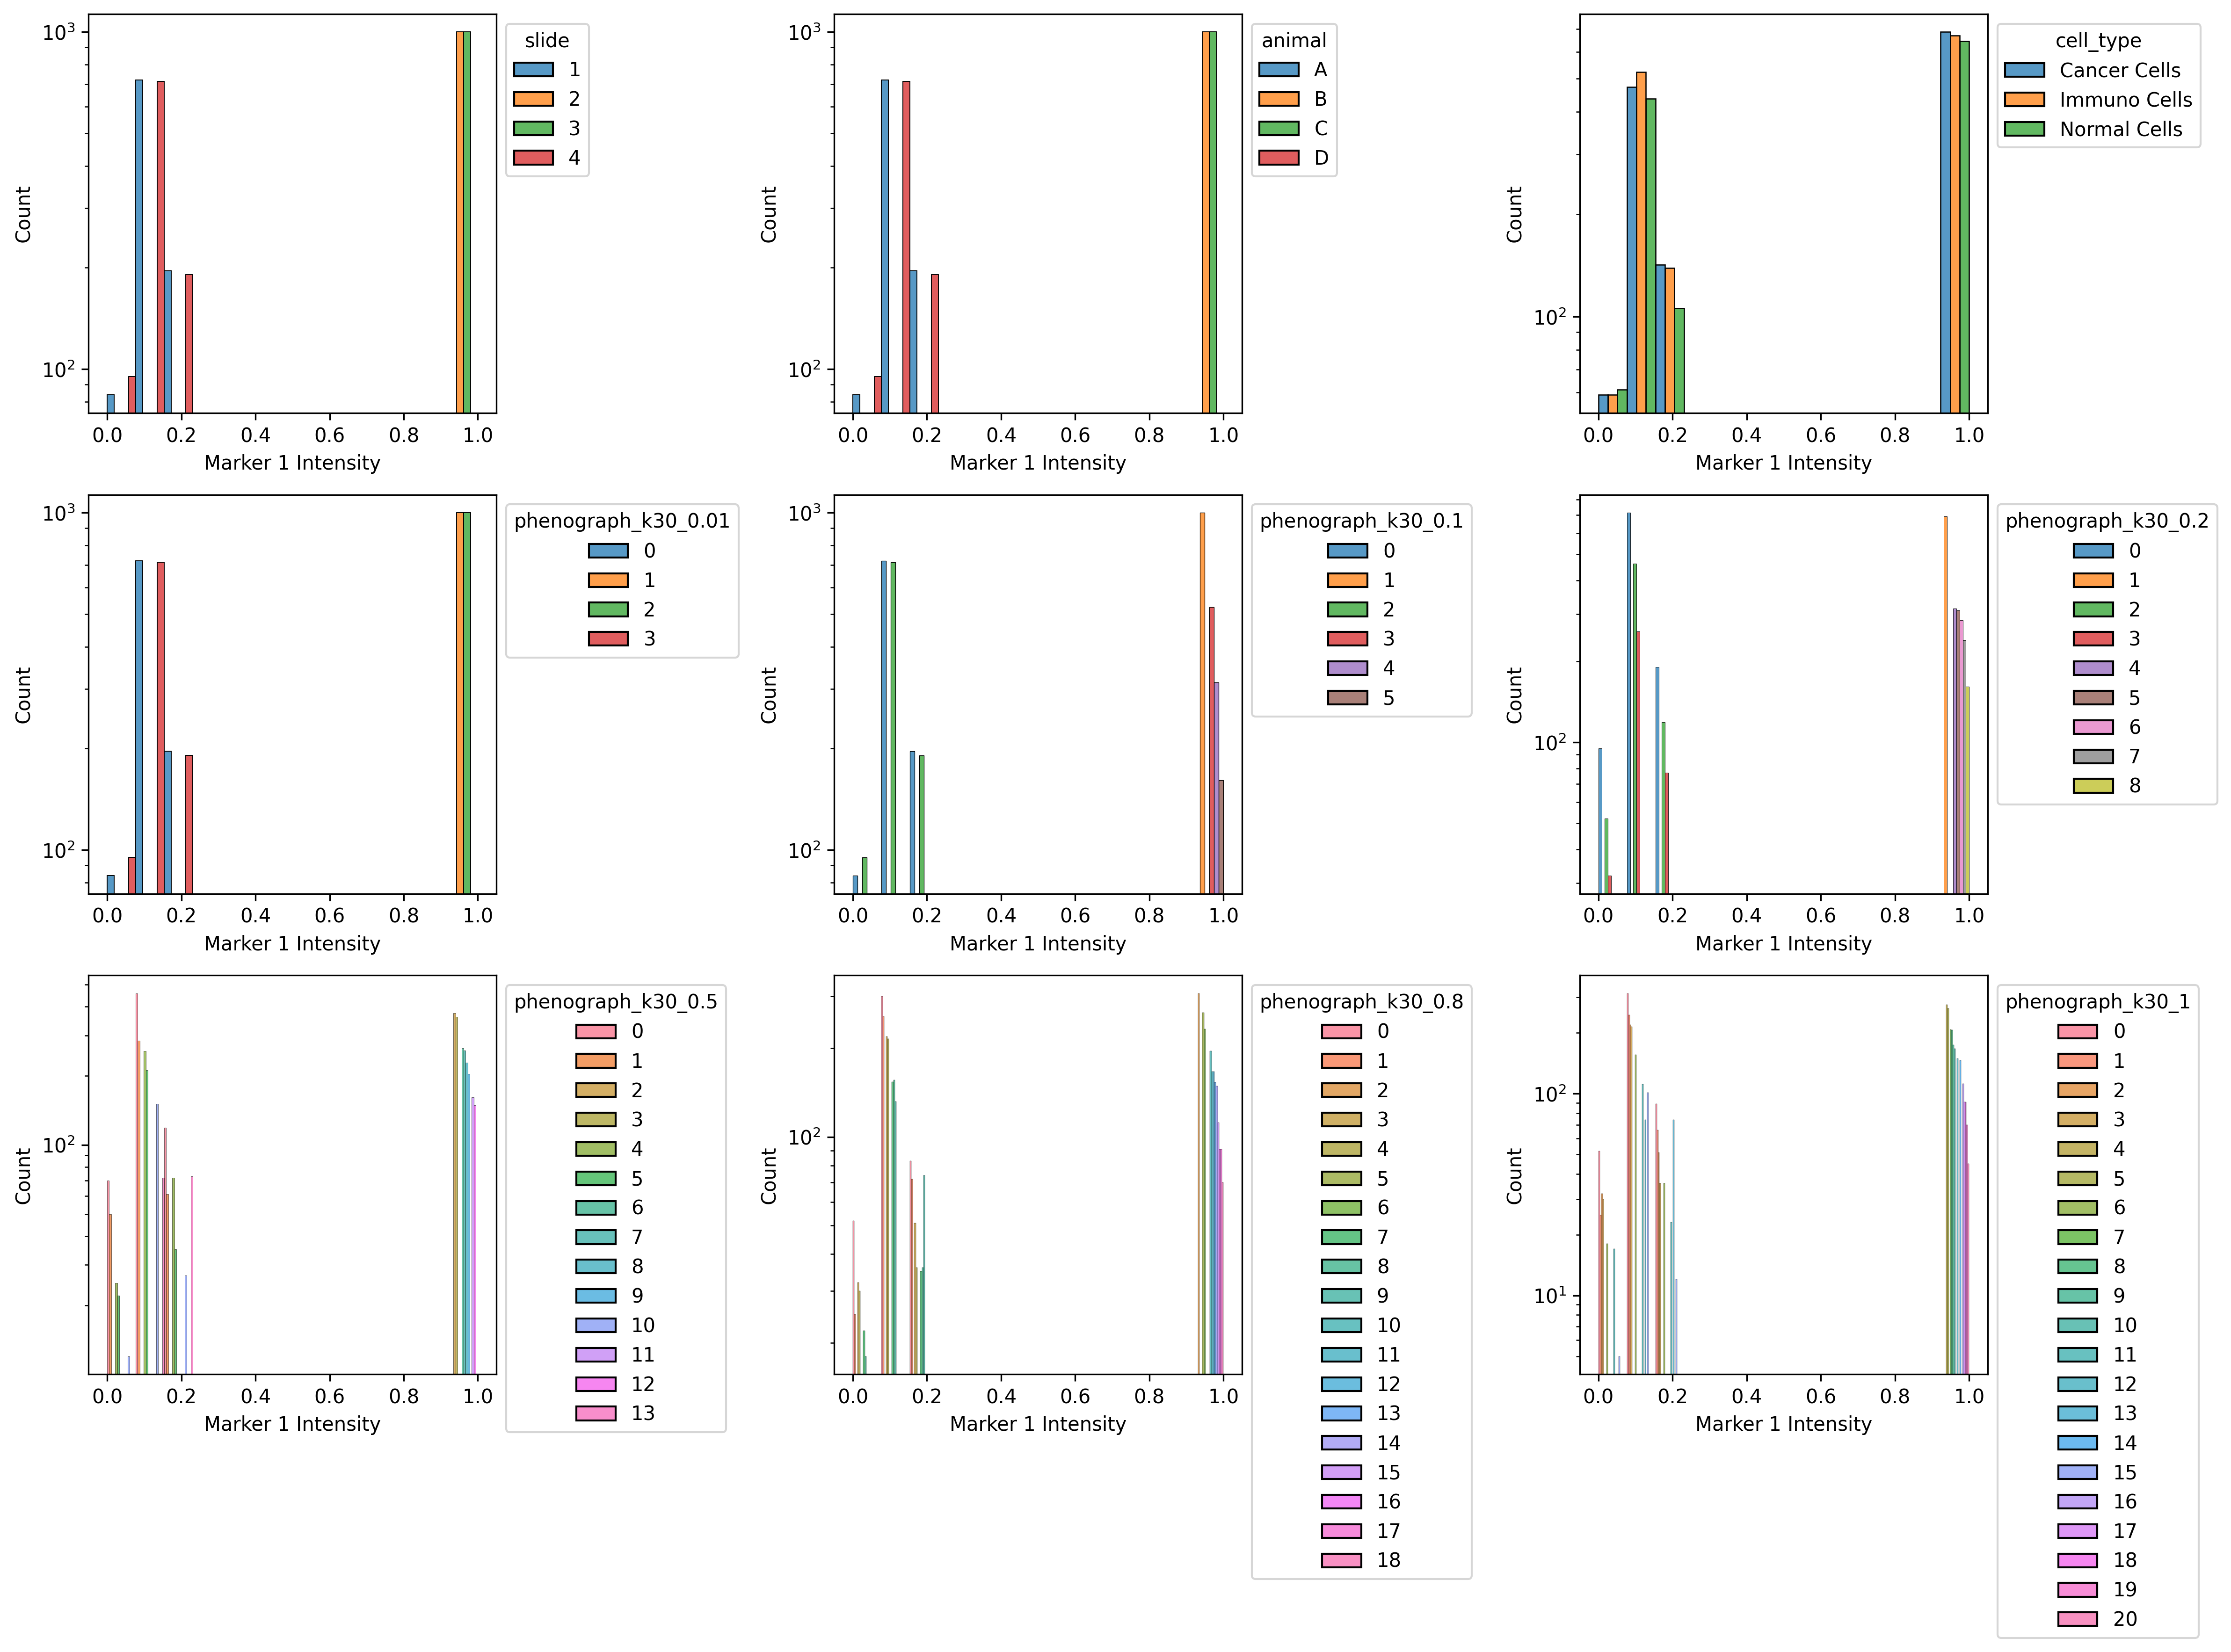

In [44]:
grid_plot_for_hisotmap("Marker 1 Intensity")


#### Marker 2 Intensity Visualization

Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31


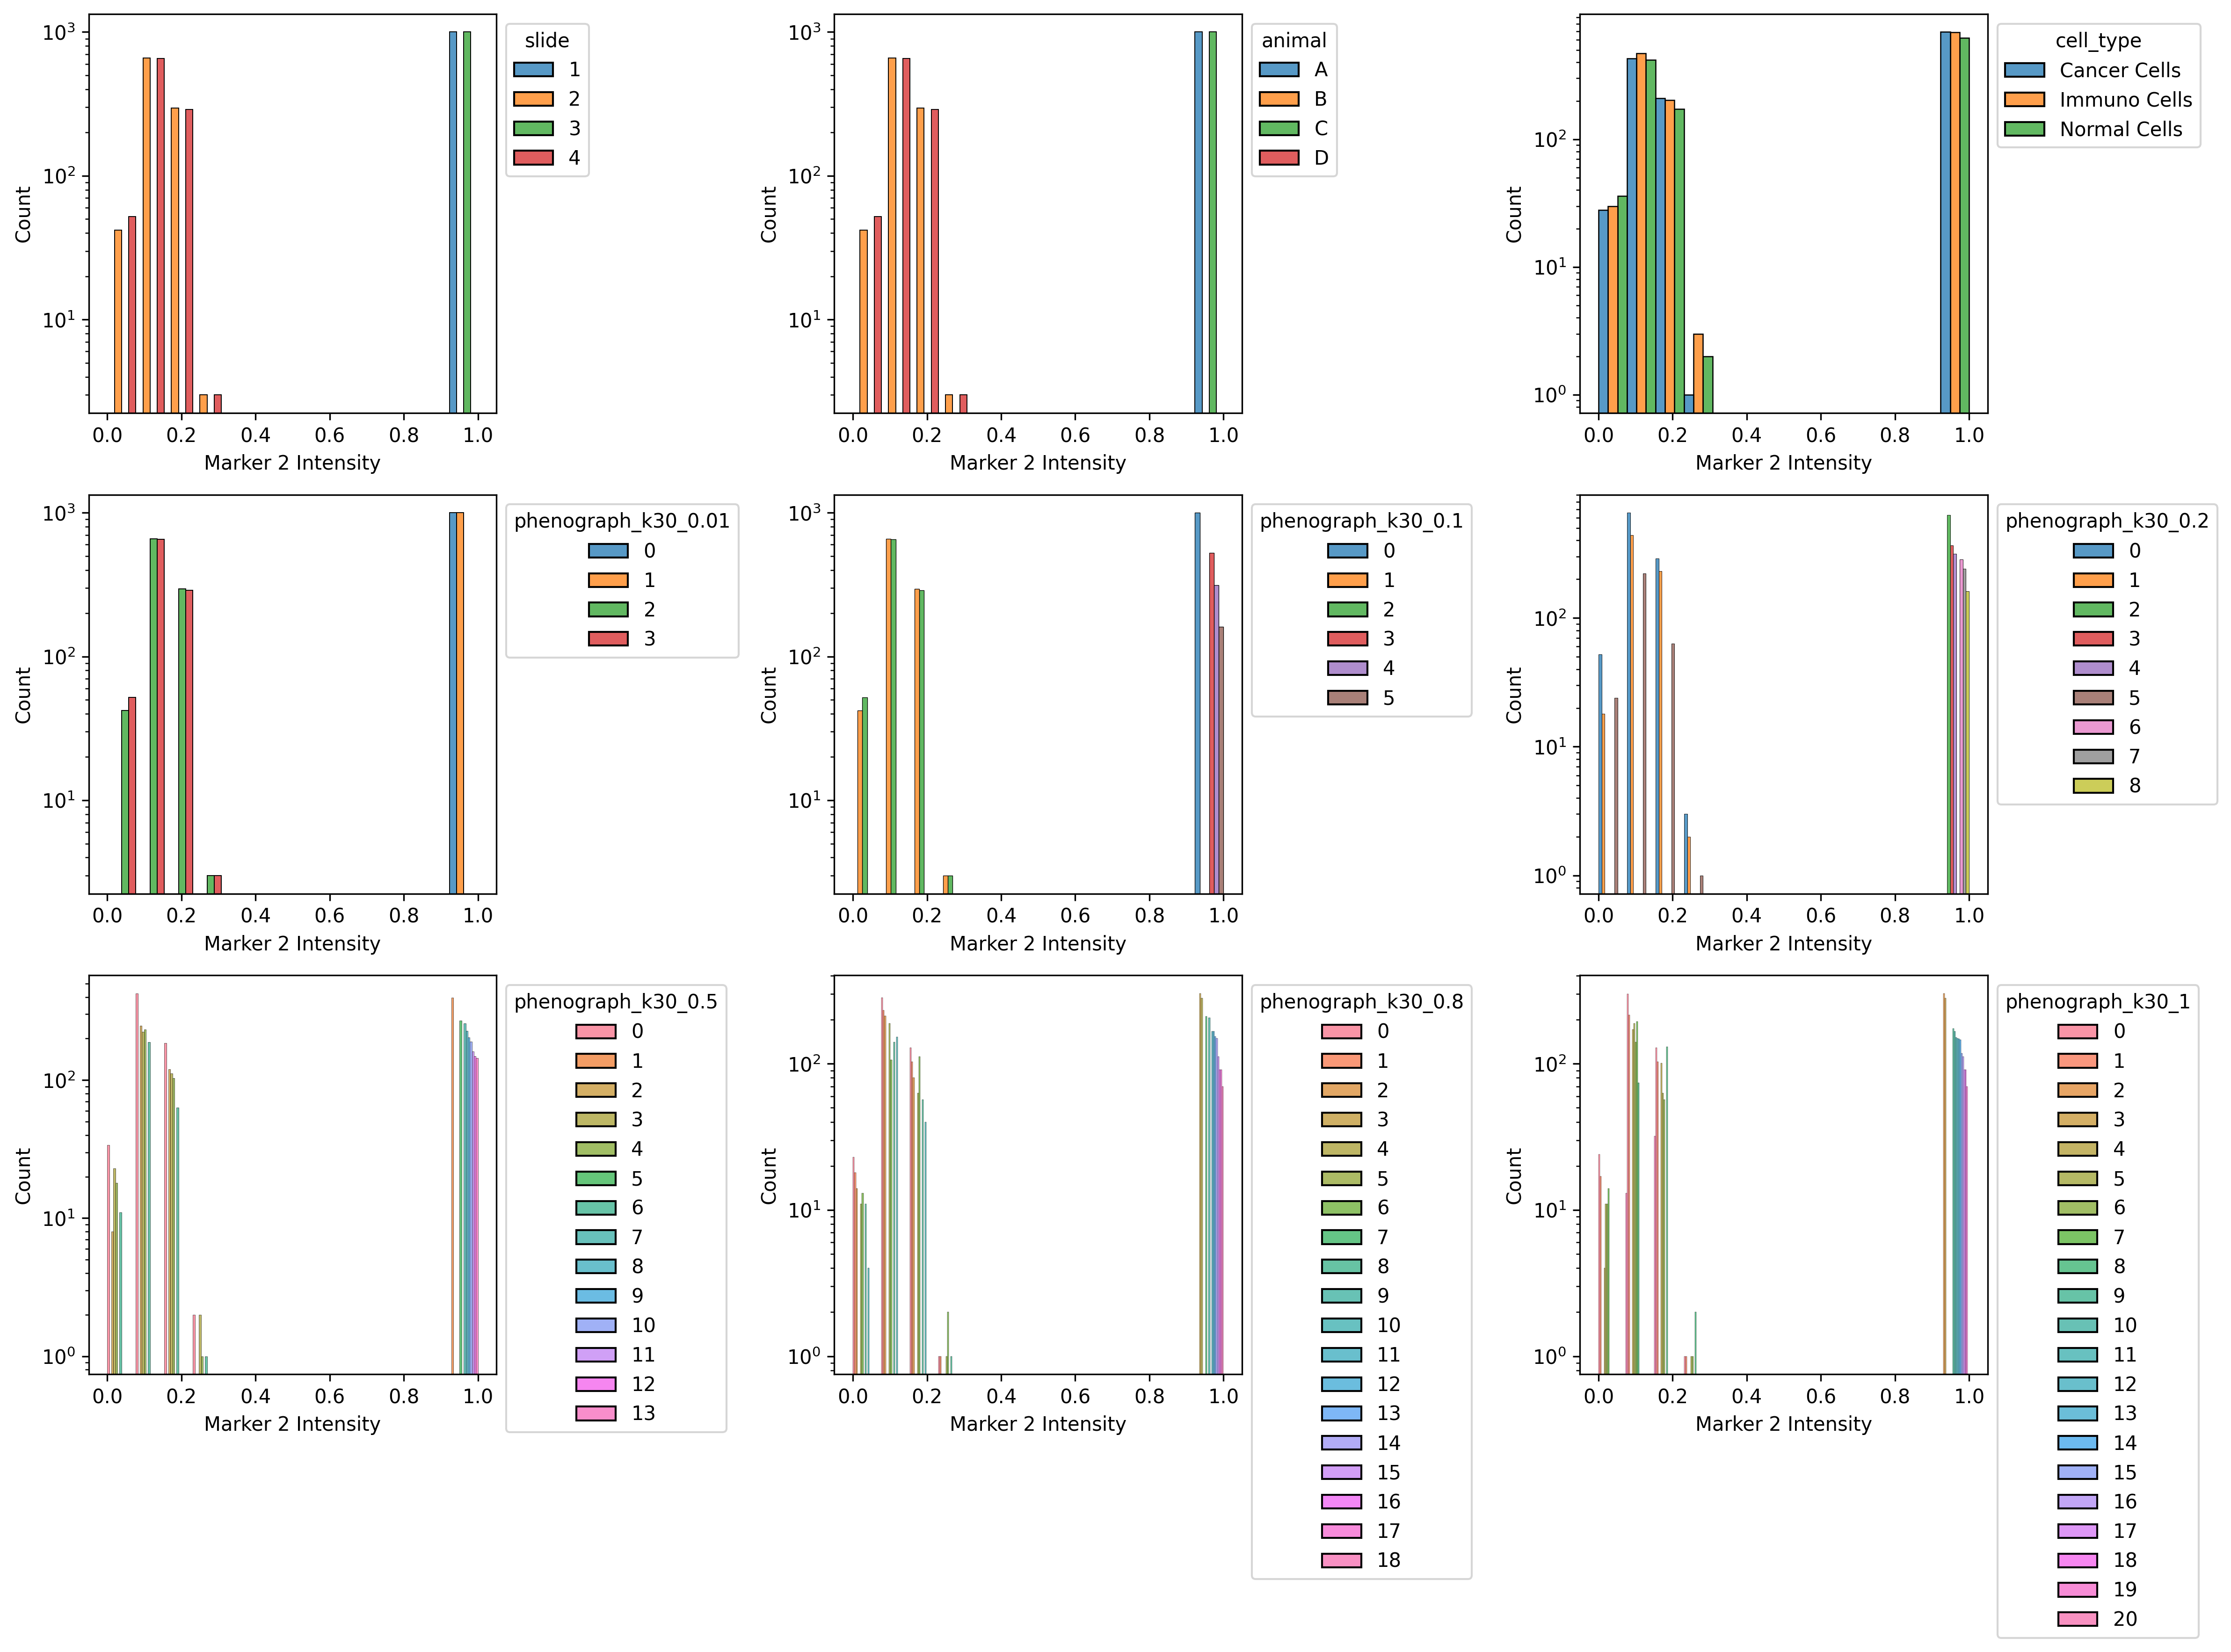

In [45]:
grid_plot_for_hisotmap("Marker 2 Intensity")


#### Marker 3 Intensity Visualization

Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31
Automatically calculated number of bins is: 31


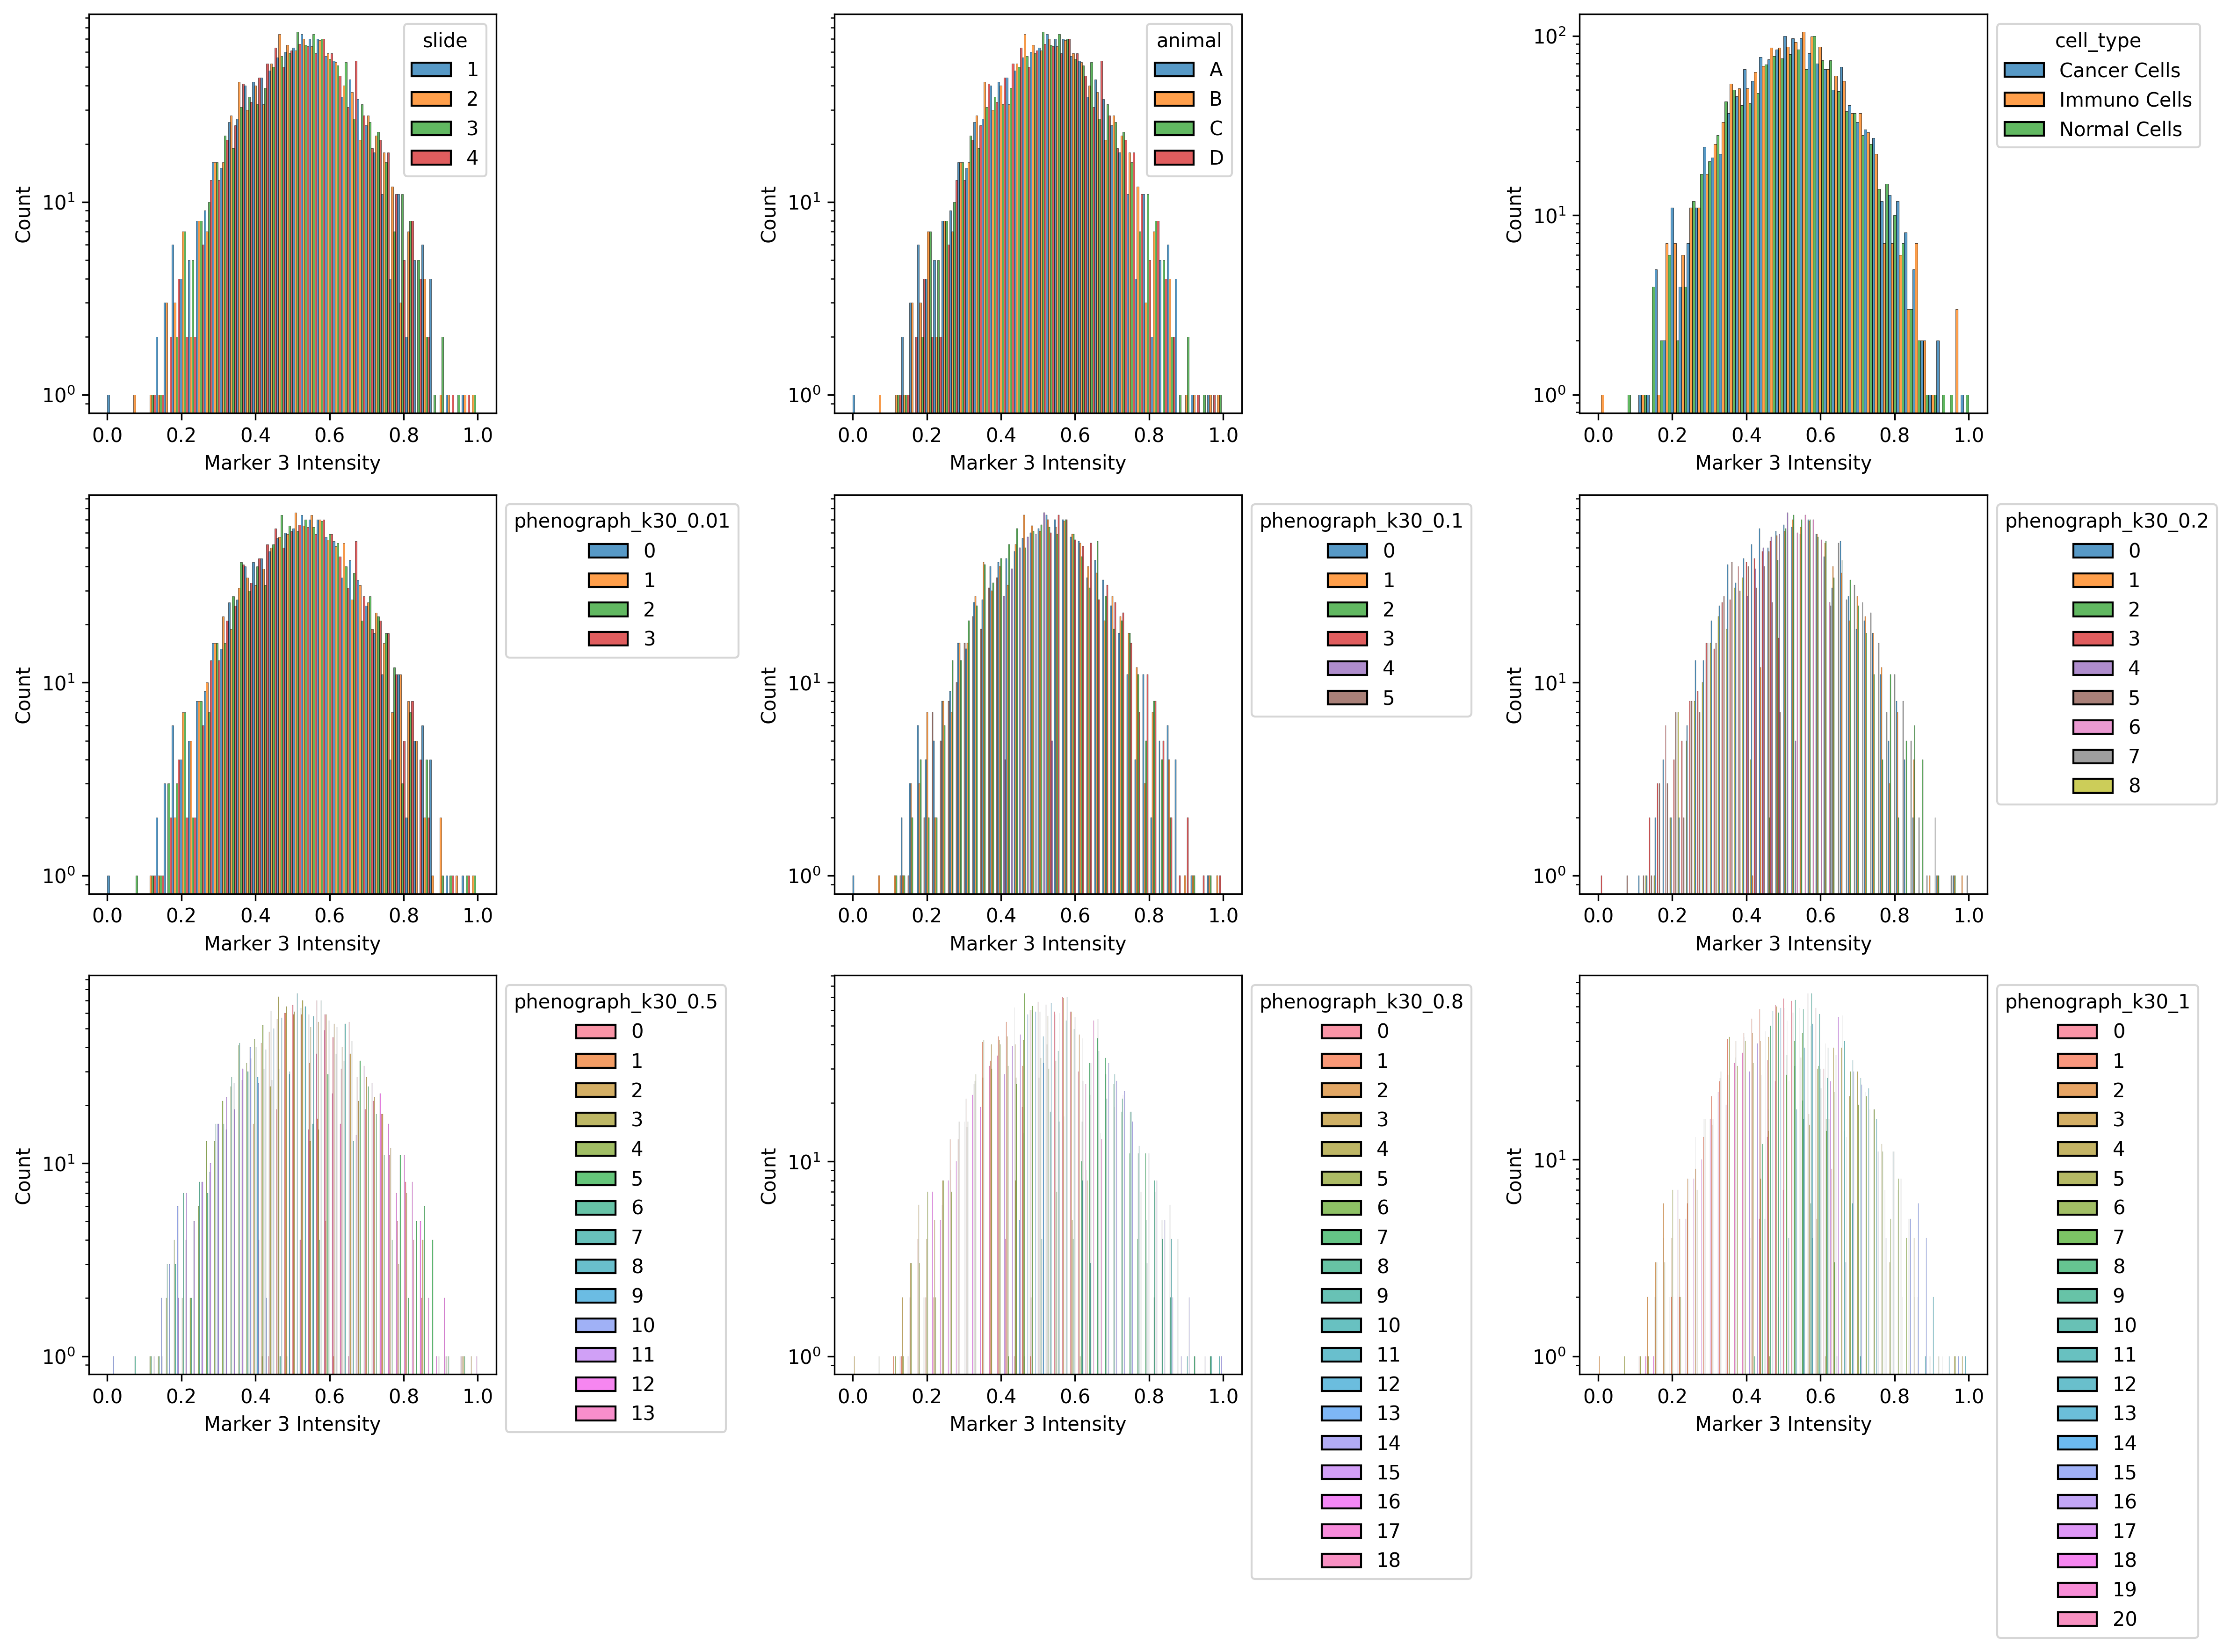

In [46]:
grid_plot_for_hisotmap("Marker 3 Intensity")

### Hierachical Heatmap

In [ ]:
def grid_plot_for_h_heatmap():
    fig_width = 20
    fig_height = 12
    fig_dpi = 300
    layer_to_plot = norm_scaled_output_layer
    features = None
    standard_scale = None
    z_score = None
    cluster_feature = True
    cluster_annotations = True
    Figure_Title = "Hierarchical Heatmap"
    font_size = 12
    matrix_ratio = 0.1
    swap_axes = False
    rotate_label = False
    r_h_axis_dengrogram =0.2
    r_v_axis_dengrogram = 0.2

    # Create a container to hold the images (a VBox inside a Scrolled output)
    output_widget = widgets.VBox()
    scrollable_output = widgets.Output()
    with scrollable_output:
        # Loop through each annotation and create UMAP plots
        for i, annotation in enumerate(annotations):
            _, clustergrid, _ = hierarchical_heatmap(
                adata, 
                annotation=annotation,
                features=features, 
                layer=layer_to_plot,
                cluster_feature=cluster_feature,
                cluster_annotations=cluster_annotations,
                standard_scale=standard_scale,
                z_score=z_score,
                swap_axes=swap_axes,
                rotate_label=rotate_label,
                figsize=(fig_width,fig_height),
                dendrogram_ratio=(r_h_axis_dengrogram,r_v_axis_dengrogram)
            )

            clustergrid.ax_heatmap.set_title(f'{Figure_Title}: {annotation}', fontsize=font_size)
            clustergrid.height = fig_height*matrix_ratio
            clustergrid.width = fig_width*matrix_ratio

            # Adjust layout to prevent overlapping
            plt.tight_layout()

            # Show the plot
            plt.show()

    # Set scrollable area
    scroll_area = widgets.VBox([scrollable_output])
    scrollable_area = widgets.VBox([widgets.HTML("<h3>Scrollable Area with Multiple Plots</h3>"), scroll_area])
    scrollable_area.layout = widgets.Layout(overflow_y='scroll', height='600px', width='800px', border='1px solid black')
    
    # Display the scrollable widget
    display(scrollable_area)

In [59]:
grid_plot_for_h_heatmap()